DATA PREPROCESSIONG

In [2]:
import pandas as pd

df = pd.read_csv('processed_data.csv')  


CITY COLUMNS

In [3]:
df['city'].value_counts().head(10)

city
Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Kirkland        187
Issaquah        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: count, dtype: int64

In [ ]:
#label encoder convert labels to numbers
from sklearn.preprocessing import LabelEncoder
city = LabelEncoder()
df['city'] = city.fit_transform(df[['city']])


In [5]:
df['city'].value_counts().head(5)

city
35    1573
32     293
3      286
31     235
19     187
Name: count, dtype: int64

country columns

In [6]:
#dealing with the particular columns
df['country'].head()#display the first entries

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country, dtype: object

In [ ]:
#encoder it so it can`t be remove the column
df['country'] = LabelEncoder().fit_transform(df[['country']])

In [9]:
df['country'].value_counts().head(5)

country
0    4600
Name: count, dtype: int64

street columns

In [10]:
df['street'].value_counts().nlargest(10)


street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
11807 NE 105th Ct        2
14583 NE 58th St         2
3715 NE 153rd St         2
4924 SE 2nd Pl           2
24345 35th Pl S          2
Name: count, dtype: int64

In [11]:
df['street'].nunique()

4525

In [12]:
df.drop(columns='street',inplace=True)

DATE COLUMN

In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df['date'].value_counts().head(5)

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
Name: count, dtype: int64

STATE ZIP COLUMN

In [15]:
df['statezip'].head()

0    WA 98133
1    WA 98119
2    WA 98042
3    WA 98008
4    WA 98052
Name: statezip, dtype: object

In [16]:
#remove the wa
df['statezip'] =df['statezip'].str.replace('WA','').astype(int)

In [17]:
df['statezip'].value_counts().head(5)

statezip
98103    148
98052    135
98117    132
98115    130
98006    110
Name: count, dtype: int64

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


CHECK CORRELATION OF DATA

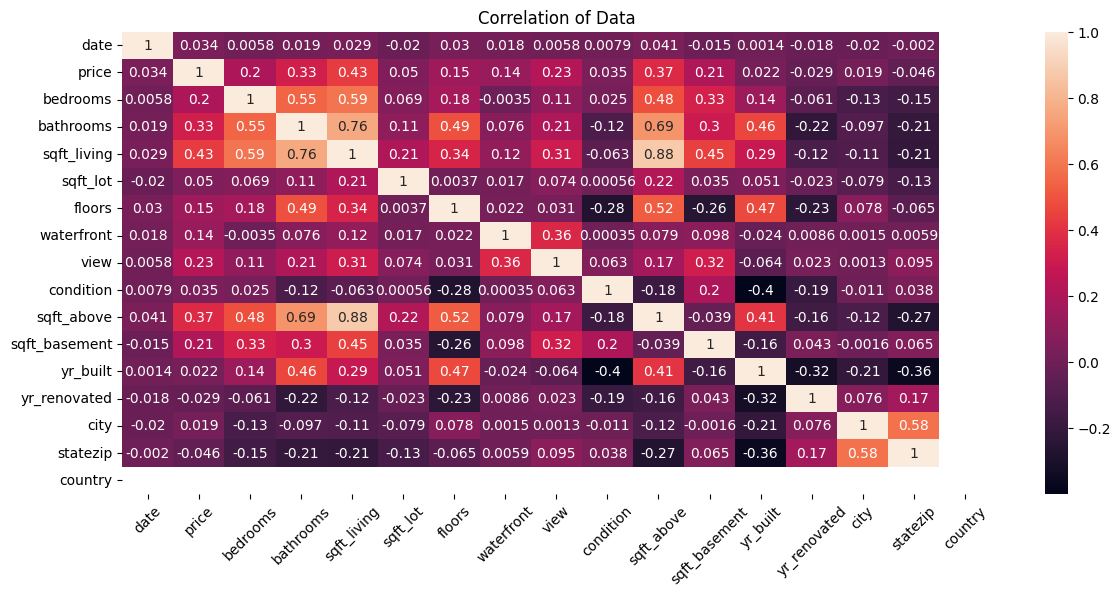

In [19]:
#PLOT THE CORRELATION OF THE DATA USING HEATMAP
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True )
plt.title("Correlation of Data")
plt.xticks(rotation=45)
plt.show()

ACCORDING TO THE HEATMAP WE OBSERVED THE COLUMNS (COUNTRY,CITY,STATEZIP,YR_RENOVATED AND DATE)
DOES NOT MAKE SENSE 

In [20]:
#i remove this columns
df=df.drop(columns=['yr_renovated','city','statezip','country','date'])

<Axes: ylabel='price'>

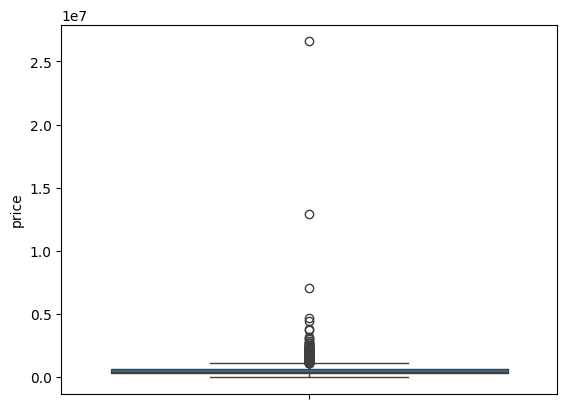

In [21]:
sns.boxplot(df['price'])

THE OUTLIERS PRESENT IN THE COLUMN DOES NOT PRESENT DATA ACCURATELY

In [22]:
#remove the outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

RELATIONSHIP BETWEEN PRICE AND BATHROOMS

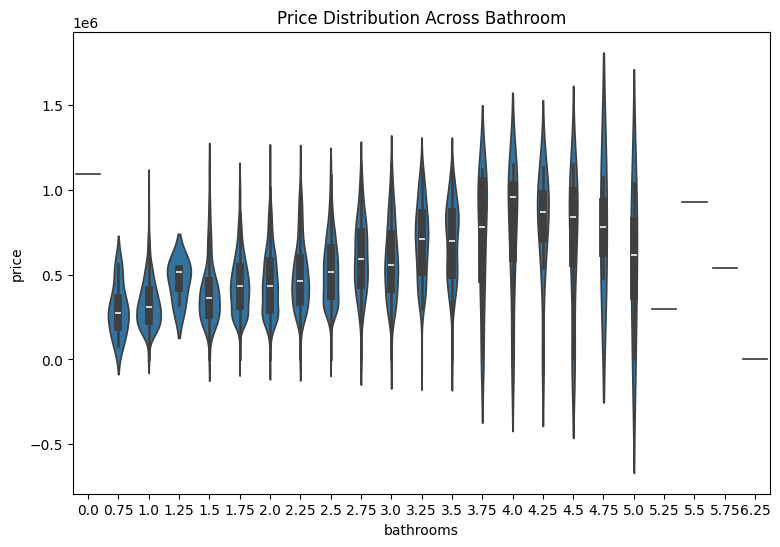

In [24]:
plt.figure(figsize=(9,6))
sns.violinplot(x='bathrooms',y='price',data=df)
plt.title('Price Distribution Across Bathroom')
plt.show()


RELATIONSHIP BETWEEN THR PRICE AND SQAURE FOOTAGE

<Axes: xlabel='price', ylabel='sqft_living'>

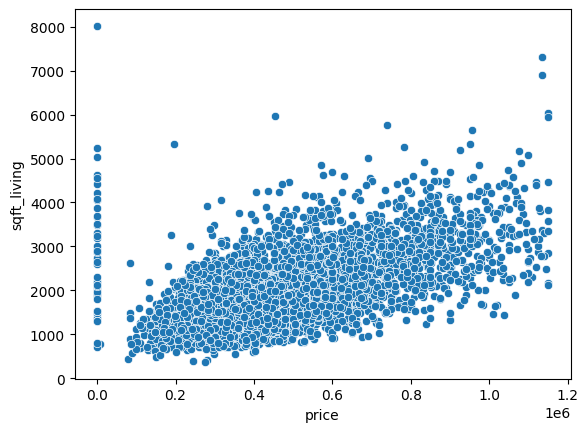

In [25]:
#Visualizes a scatter plot 
sns.scatterplot(df,x='price',y='sqft_living')

<Axes: xlabel='sqft_living', ylabel='Count'>

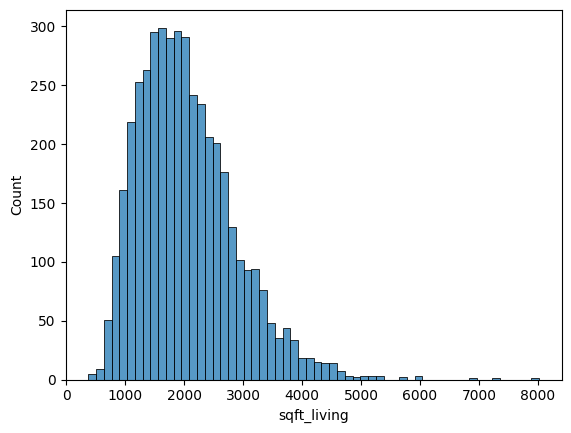

In [26]:
sns.histplot(df['sqft_living'])

In [29]:
df[df['price']==0].head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013


PRICE IS ZERO WICH SHOWS UNREALISTIC AND THATS NOT REFELECT MARKET VALUE

In [30]:
df = df[df['price']!=0]

<Axes: xlabel='sqft_living', ylabel='Count'>

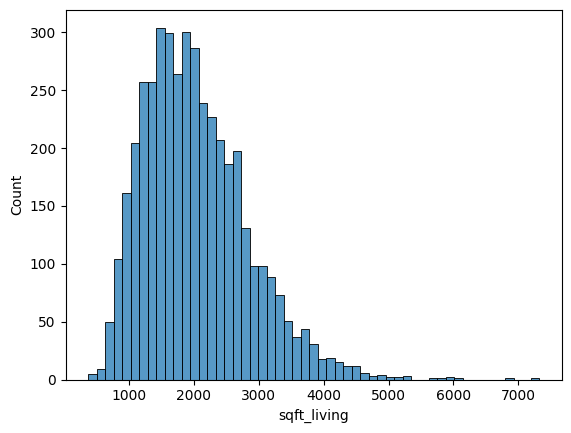

In [32]:
sns.histplot(df['sqft_living'])

PLOT TREND PRICE VS SQFT_LIVING

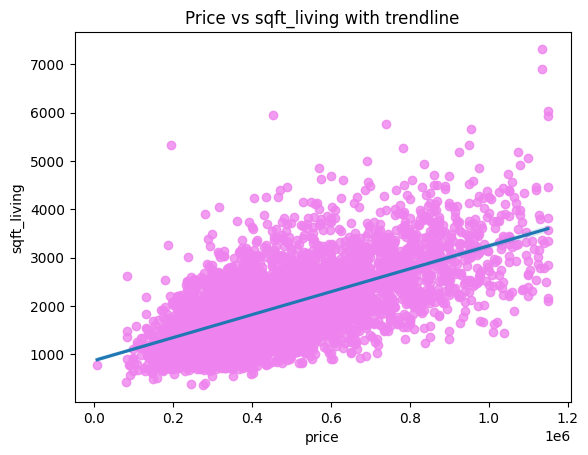

In [38]:
#visualize the plot 
sns.regplot(x="price",y='sqft_living',
            data=df,#passing the data 
            scatter_kws={'color':'violet'}#dislay color to the scatter
)
plt.title("Price vs sqft_living with trendline")
plt.show()

In [39]:
df.shape

(4311, 12)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938


THE DATASET HAS BEEN PROCESSED AND READY FOR TRAINIING AND TESTING